# Melody Match
## Songs Recommendation System

### This recommendation system is based in the songs that we specify or the mood we are in or both

> In this project we have used cosine similarity to select the similar to the songs that were specified by the user, and based on a few attributes from the dataset about the songs we have segregated the songs into different moods

#### Once we have load the data and imported all the necessary libraries we shall follow the following steps:

> **STEP 1 Data Preprocessing**:
> * Load the Data: Read the dataset into a DataFrame.
> * Handle Missing Values: Check and handle missing values appropriately.
> * Normalize/Standardize Features: Normalize or standardize numerical features for better performance.


> **Step 2: Feature Engineering**:
> * Create Mood Labels: If not already present, create mood labels based on features like valence, energy, danceability, etc.
> * Feature Selection: Select relevant features for recommendation, such as key, mode, danceability, valence, energy, acousticness, instrumentalness, and liveness_speechiness.

> **Step 3: Content-Based Filtering:**
> * Content-based filtering recommends songs based on the features of the song you're currently listening to.
> * Calculate Cosine Similarity: Use cosine similarity to find songs similar to the one currently being played.

> **Step 4: Implementing the Recommendation System:**
> * Build a Recommendation Function: Create a function to recommend songs based on the current song or mood.

#### Step 1: Data Preprocessing

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

from functools import partial

In [10]:
df = pd.read_csv(r"tracks_features.csv", encoding='latin1')

In [11]:
df.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


In [12]:
df.shape

(1204025, 24)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1204025 non-null  object 
 1   name              1204022 non-null  object 
 2   album             1204014 non-null  object 
 3   album_id          1204025 non-null  object 
 4   artists           1204025 non-null  object 
 5   artist_ids        1204025 non-null  object 
 6   track_number      1204025 non-null  int64  
 7   disc_number       1204025 non-null  int64  
 8   explicit          1204025 non-null  bool   
 9   danceability      1204025 non-null  float64
 10  energy            1204025 non-null  float64
 11  key               1204025 non-null  int64  
 12  loudness          1204025 non-null  float64
 13  mode              1204025 non-null  int64  
 14  speechiness       1204025 non-null  float64
 15  acousticness      1204025 non-null  float64
 16  

In [14]:
df.isnull().sum()

id                   0
name                 3
album               11
album_id             0
artists              0
artist_ids           0
track_number         0
disc_number          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
year                 0
release_date         0
dtype: int64

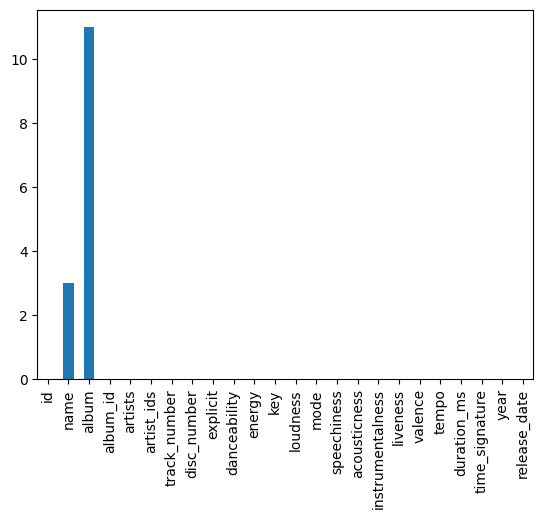

In [15]:
df.isnull().sum().plot.bar()
plt.show()

In [16]:
df.describe()

,track_number,disc_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
count,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06
mean,7.656352e+00,1.055906e+00,4.930565e-01,5.095363e-01,5.194151e+00,-1.180870e+01,6.714595e-01,8.438219e-02,4.467511e-01,2.828605e-01,2.015994e-01,4.279866e-01,1.176344e+02,2.488399e+05,3.832494e+00,2.007328e+03
std,5.994977e+00,2.953752e-01,1.896694e-01,2.946839e-01,3.536731e+00,6.982132e+00,4.696827e-01,1.159914e-01,3.852014e-01,3.762844e-01,1.804591e-01,2.704846e-01,3.093705e+01,1.622104e+05,5.611826e-01,1.210117e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00,0.000000e+00
25%,3.000000e+00,1.000000e+00,3.560000e-01,2.520000e-01,2.000000e+00,-1.525400e+01,0.000000e+00,3.510000e-02,3.760000e-02,7.600000e-06,9.680000e-02,1.910000e-01,9.405400e+01,1.740900e+05,4.000000e+00,2.002000e+03
50%,7.000000e+00,1.000000e+00,5.010000e-01,5.240000e-01,5.000000e+00,-9.791000e+00,1.000000e+00,4.460000e-02,3.890000e-01,8.080000e-03,1.250000e-01,4.030000e-01,1.167260e+02,2.243390e+05,4.000000e+00,2.009000e+03
75%,1.000000e+01,1.000000e+00,6.330000e-01,7.660000e-01,8.000000e+00,-6.717000e+00,1.000000e+00,7.230000e-02,8.610000e-01,7.190000e-01,2.450000e-01,6.440000e-01,1.370460e+02,2.858400e+05,4.000000e+00,2.015000e+03
max,5.000000e+01,1.300000e+01,1.000000e+00,1.000000e+00,1.100000e+01,7.234000e+00,1.000000e+00,9.690000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.489340e+02,6.061090e+06,5.000000e+00,2.020000e+03


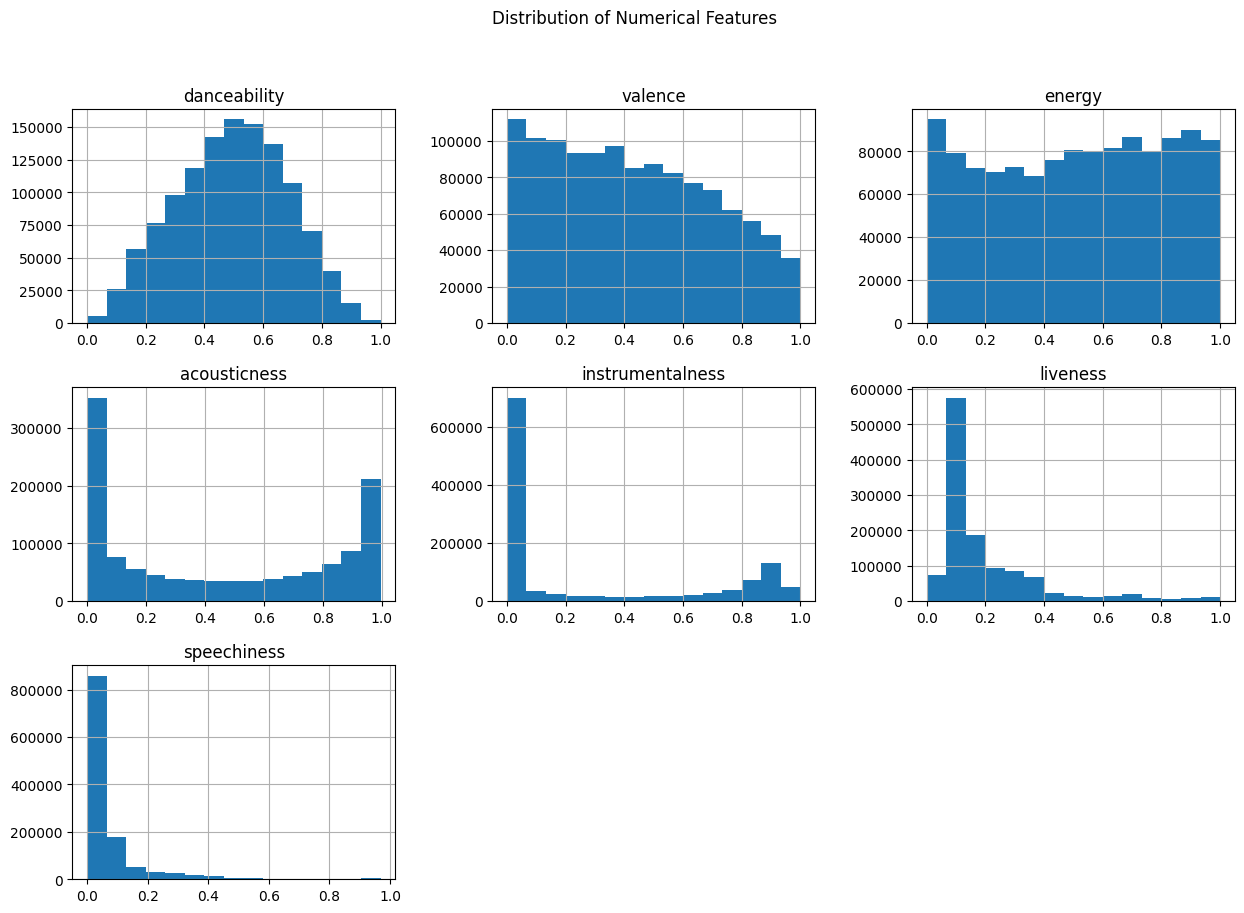

In [17]:
numerical_features = ['danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']
df[numerical_features].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

In [18]:
df.dtypes

id                   object
name                 object
album                object
album_id             object
artists              object
artist_ids           object
track_number          int64
disc_number           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature      float64
year                  int64
release_date         object
dtype: object

In [19]:
df['name'] = df['name'].str.lower()

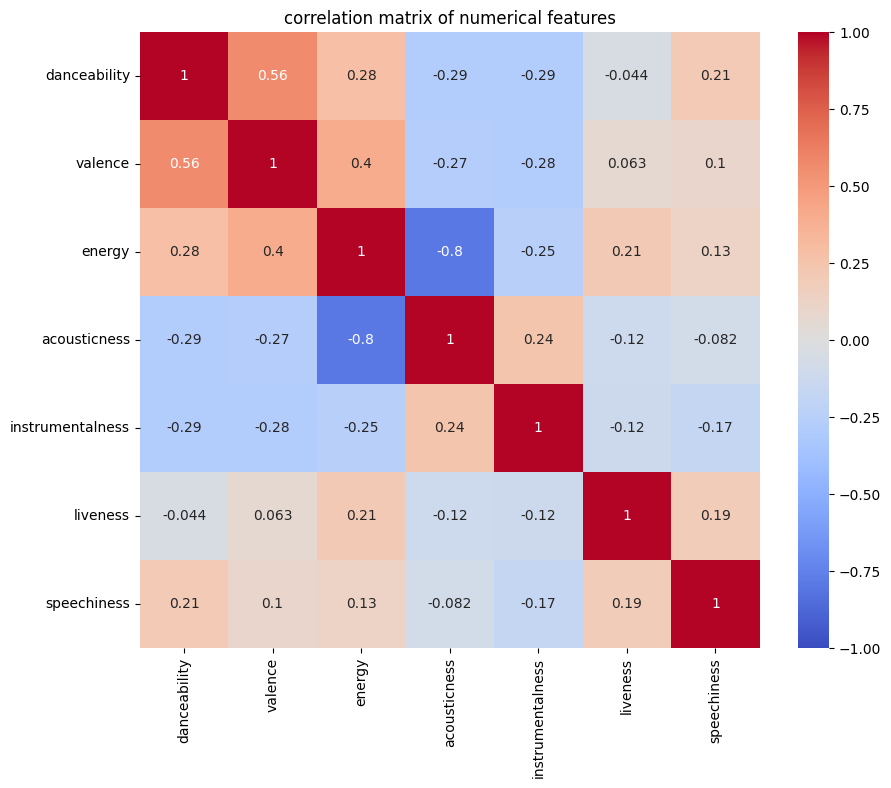

In [20]:
corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm', vmin=-1,vmax=1)
plt.title('correlation matrix of numerical features')
plt.show()

In [21]:
df['name'].nunique(), df.shape

(830773, (1204025, 24))

In [22]:
df.dtypes

id                   object
name                 object
album                object
album_id             object
artists              object
artist_ids           object
track_number          int64
disc_number           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature      float64
year                  int64
release_date         object
dtype: object

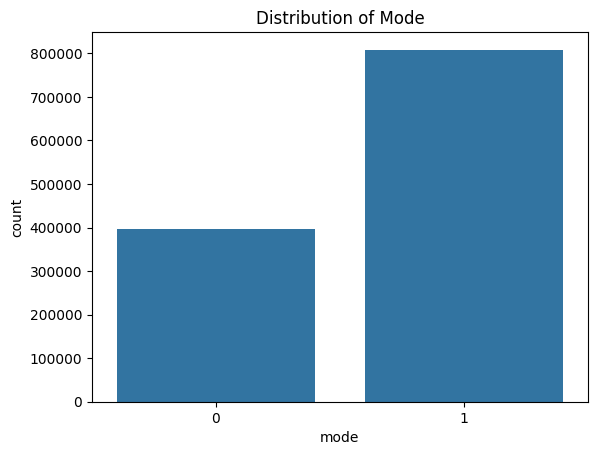

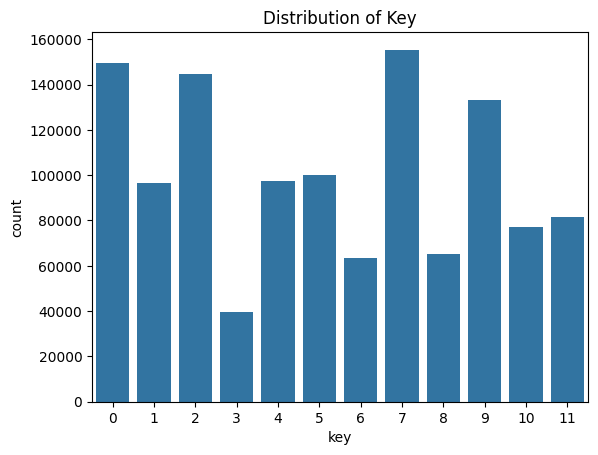

In [23]:
sns.countplot(x='mode', data=df)
plt.title('Distribution of Mode')
plt.show()

sns.countplot(x='key', data=df)
plt.title('Distribution of Key')
plt.show()

#### Step 2: Feature Engineering

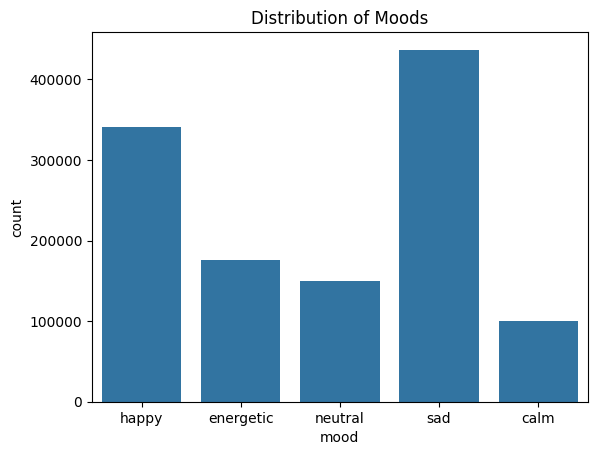

In [24]:
def categorize_mood(row):
    if row['valence'] > 0.5 and row['energy'] > 0.5:
        return 'happy'
    elif row['valence'] < 0.5 and row['energy'] < 0.5:
        return 'sad'
    elif row['energy'] > 0.7:
        return 'energetic'
    elif row['acousticness'] > 0.5 and row['energy'] < 0.5:
        return 'calm'
    else:
        return 'neutral'

df['mood'] = df.apply(categorize_mood, axis=1)

# Plot the distribution of moods
sns.countplot(x='mood', data=df)
plt.title('Distribution of Moods')
plt.show()


In [25]:
features = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


##### Clustered each feature to understand its distribution

In [26]:
from sklearn.preprocessing import StandardScaler


In [27]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

In [28]:
from sklearn.cluster import KMeans

# Apply KMeans clustering
n_clusters = 5  # You can experiment with different numbers of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_scaled)

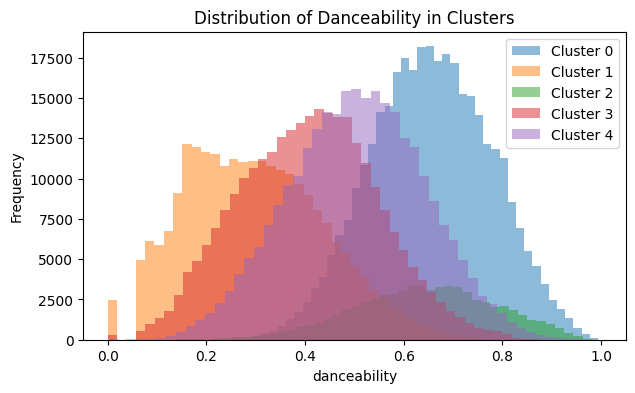

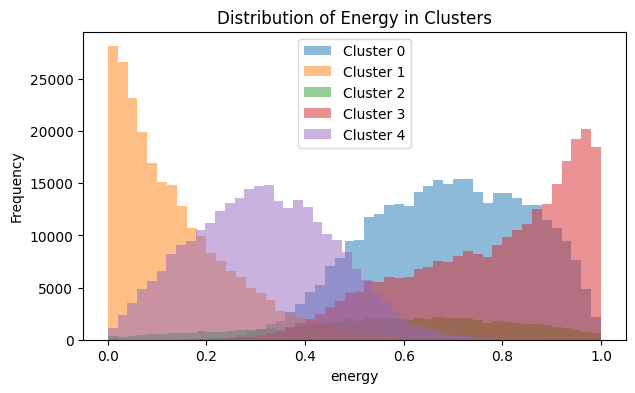

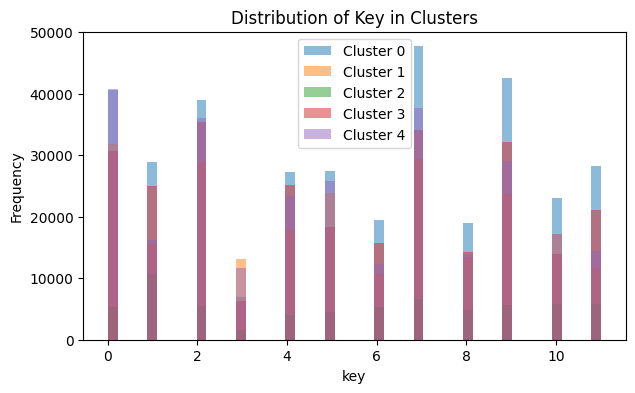

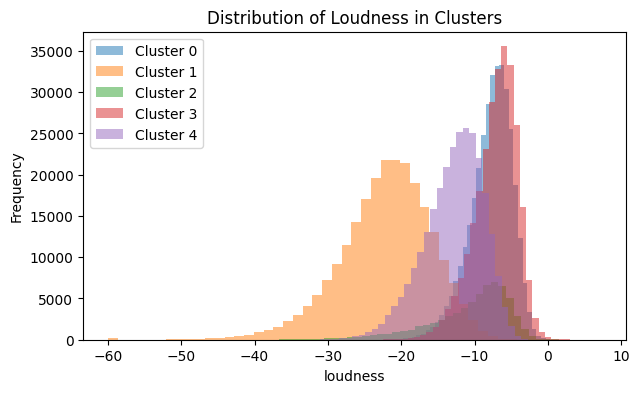

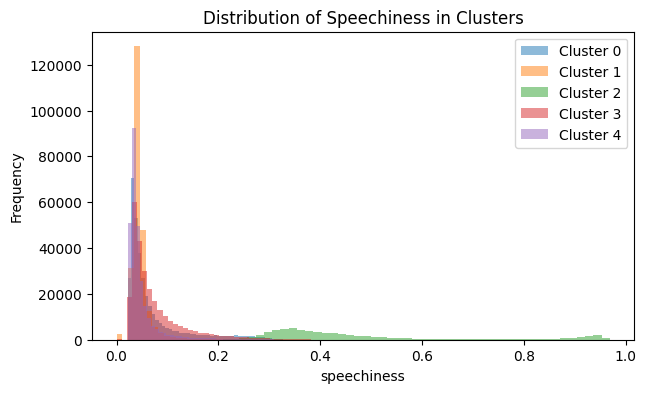

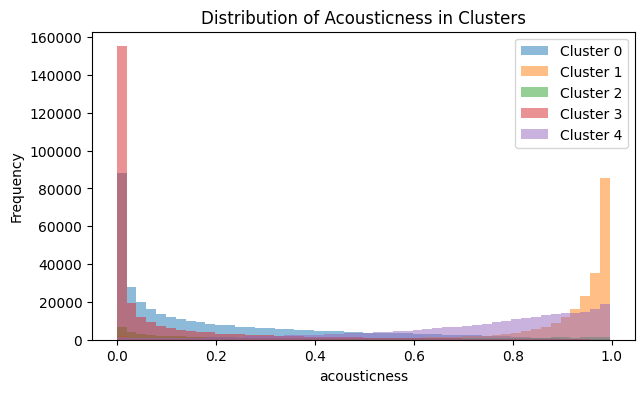

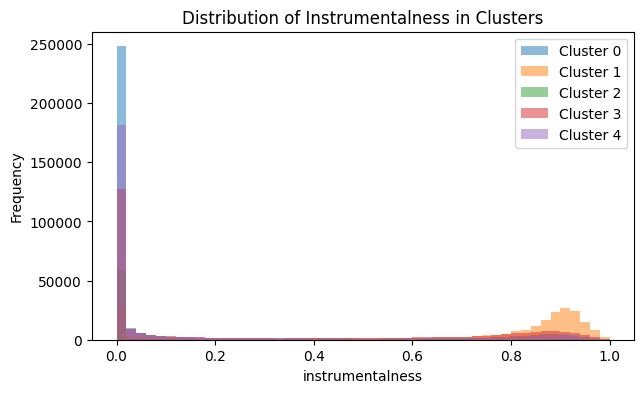

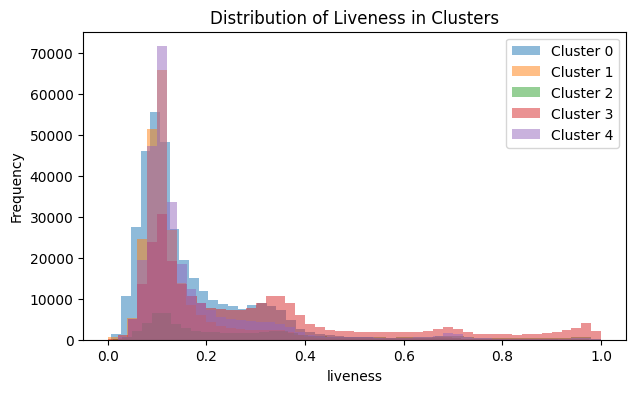

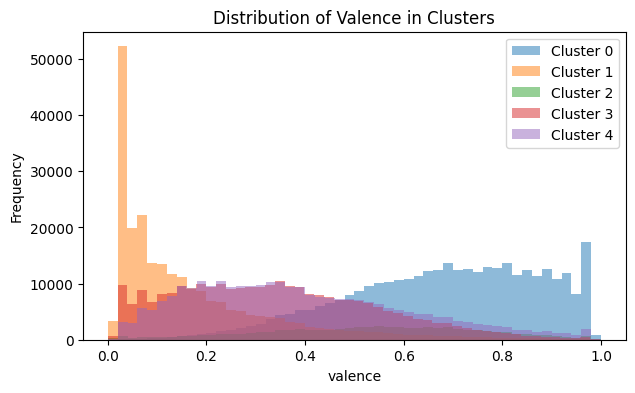

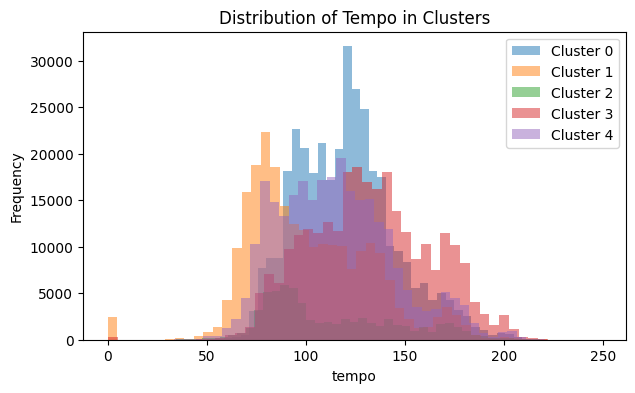

In [29]:
for feature in features:
    plt.figure(figsize=(7, 4))
    for cluster in range(n_clusters):
        cluster_data = df[df['cluster'] == cluster]
        plt.hist(cluster_data[feature], bins=50, alpha=0.5, label=f'Cluster {cluster}')
    plt.title(f'Distribution of {str(feature).capitalize()} in Clusters')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

#### Step 3: Content-Based Filtering

In [157]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_songs_by_song_name(song_name, df, n_recommendations=5):
    # Check if the song exists in the dataset
    if song_name not in df['name'].values:
        raise ValueError("The specified song name does not exist in the dataset.")
    
    song = df[df['name'] == song_name].iloc[0]
    features = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
    song_features = song[features].values.reshape(1, -1)

    # Calculate cosine similarity between the song and all other songs
    similarity_scores = cosine_similarity(song_features, df[features])

    # Get indices of top similar songs
    similar_song_indices = similarity_scores.argsort()[0][::-1][1:n_recommendations+1]
    return df.iloc[similar_song_indices][['name', 'artists', 'album', 'mood']]

recommend_songs_by_song_name = partial(recommend_songs_by_song_name, df = df)
recommend_songs_by_song_name("ten")

,name,artists,album,mood
391527,everyone i hate should be killed,['Oozing Wound'],Retrash,happy
243810,son of wallet ball,"['Traitors', 'Matt Skiba', 'Todd Pot']",Everything Went Shit,happy
377923,bullet juice (demo),['Venomin James'],Crowe Valley Blues,energetic
956879,jezebel,['Mime Riot'],Fear,energetic
575156,chaser,['TomboFry'],"SAW, Vol. II: Enclosure",happy


In [107]:
def recommend_songs_by_mood(mood, df, n_recommendations=5):
    recommendations = df[df['mood'] == mood].sample(n=n_recommendations)
    return recommendations[['name', 'album']]
recommend_songs_by_mood = partial(recommend_songs_by_mood, df = df)
recommend_songs_by_mood("happy")

,name,album
1145623,idnu,Try to Stay Positive
354911,me and miguel,Bean Bag Bop
726028,mali vodka,Clean
1196362,weil ich dich hab,"Tausend TrÃ¤ume, Vol. 2"
802274,doubly doubting thomas,Montgomery Street


In [156]:
def hybrid_recommendation(df, song_name, mood, n_recommendations=5):
    # Get song-based recommendations
    song_recommendations = recommend_songs_by_song_name(song_name=song_name, n_recommendations=n_recommendations * 2)
    # Filter recommendations by mood
    mood_recommendations = song_recommendations[song_recommendations['mood'] == mood].head(n_recommendations)    
    return mood_recommendations

hybrid_recommendation = partial(hybrid_recommendation, df = df)
hybrid_recommendation(song_name = "ten", mood = "happy")


,name,artists,album,mood
391527,everyone i hate should be killed,['Oozing Wound'],Retrash,happy
243810,son of wallet ball,"['Traitors', 'Matt Skiba', 'Todd Pot']",Everything Went Shit,happy
575156,chaser,['TomboFry'],"SAW, Vol. II: Enclosure",happy
1021016,highway 203,['Sven Horlemann'],in.com.plete,happy
781816,frayed ends,['Xtortion Audio'],Rogue,happy


In [159]:
from tabulate import tabulate

def print_recommendations(recommendations):
    return tabulate(recommendations, headers='keys', tablefmt='dashed', showindex=False, stralign='left')

# Example usage
recommendations = recommend_songs_by_song_name('shape of you')
print(print_recommendations(recommendations))


name                               artists                                             album                           mood
---------------------------------  --------------------------------------------------  ------------------------------  ------
stockholm                          ['Oddisee']                                         Traveling Man                   calm
songs of the trickster             ['Beautiful Nubia and the Roots Renaissance Band']  Soundbender                     calm
ella's song                        ['Resistance Revival Chorus']                       This Joy                        calm
ten lashes                         ['Beautiful Nubia and the Roots Renaissance Band']  Soundbender                     calm
put your mind where your heart is  ['Carolyn Porter']                                  The Best of International City  calm


#### Step 4: Implementing the Recommendation System

In [ ]:
def interactive_recommendation_system(df):
    print("---------------------------------------------------------------------------------------------------------")
    print("                                              Melody  Match                                              ")
    print("---------------------------------------------------------------------------------------------------------")
    print("Welcome to Melody Match - Your song suggesting companion")

    while True:
        print("\nPlease choose an option:")
        print("1. Get recommendations by song name")
        print("2. Get recommendations by mood")
        print("3. Get recommendations by song name and mood")
        print("4. Exit")
        
        choice = int(input("Choose 1, 2, 3, or 4: "))
        if choice == 1:
            print("Enter a song name:")
            song_name = input().strip().lower()
            try:
                recommendations = recommend_songs_by_song_name(song_name, df)
                print("Here are your recommendations:")
                print_recommendations(recommendations)
            except ValueError as e:
                print(e)
        elif choice == 2:
            print("Enter your mood (happy, sad, energetic, calm, neutral):")
            mood = input().strip().lower()
            recommendations = recommend_songs_by_mood(mood, df)
            print("Here are your recommendations:")
            print_recommendations(recommendations)
        elif choice == 3:
            print("Enter a song name:")
            song_name = input().strip().lower()
            print("Enter your mood (happy, sad, energetic, calm, neutral):")
            mood = input().strip().lower()
            recommendations = hybrid_recommendation(song_name, mood, df)
            print("Here are your recommendations:")
            print_recommendations(recommendations)
        elif choice == 4:
            print("Goodbye!")
            break
        else:
            print("Invalid choice. Please try again.")
if __name__ == "__main__":
    interactive_recommendation_system(df)

In [2]:
import gradio as gr
gr.__version__

'4.19.0'